In [1]:
#importing libaries to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load tax file
taxdata = pd.read_csv('taxable-individuals-by-assessable-income-group-annual/taxable-individuals-by-assessed-income-group.csv')

#load the bankdata into dataframe
taxdf = pd.DataFrame(taxdata)
#print(bankdf)

print("This is the shape of the dataset")
print(taxdf.shape)
print()
print("This is the index of the dataset")
print(taxdf.index)
print()
print("These are the columns in the dataset")
print(taxdf.columns)
print()
print("The total number of non-NA values in this dataset is:")
print(taxdf.count())
print()
print("A summary of this dataset is shown below:")
print(taxdf.info())
print()
print("A descriptive statistical summary of this dataset is shown below:")
print(taxdf.describe())


This is the shape of the dataset
(512, 7)

This is the index of the dataset
RangeIndex(start=0, stop=512, step=1)

These are the columns in the dataset
Index(['year_of_assessment', 'assessed_income_group', 'resident_type',
       'number_of_taxpayers', 'assessable_income', 'chargeable_income',
       'net_tax_assessed'],
      dtype='object')

The total number of non-NA values in this dataset is:
year_of_assessment       512
assessed_income_group    512
resident_type            512
number_of_taxpayers      512
assessable_income        512
chargeable_income        512
net_tax_assessed         512
dtype: int64

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year_of_assessment     512 non-null    int64 
 1   assessed_income_group  512 non-null    object
 2   resident_type          512 n

In [3]:
#selecting only rows from 2019
taxdf_2019rows = taxdf[taxdf['year_of_assessment']==2019]

#subsetting the column 'assessed_income_group'
taxdf_2019group = taxdf_2019rows['assessed_income_group']
#keyword is Tax Resident, to group the 2019 results into both tax and non-tax residents
res = '^Tax Resident'
nres = '^Non-Tax Resident'

#filter the 2019 rows with the keywords above
taxdf19_res = taxdf_2019rows[taxdf_2019rows['resident_type'].str.contains(res)]
taxdf19_nres = taxdf_2019rows[taxdf_2019rows['resident_type'].str.contains(nres)]

#saving the filtered rows and subsetting the 2 key columns 'assessed_income_group' and 'number_of_taxpayers'
data = taxdf19_res[['assessed_income_group','number_of_taxpayers']]
datanres = taxdf19_nres[['assessed_income_group','number_of_taxpayers']]

#print(data)
#print(taxdf_2019rows)
#print(taxdf_2019group)
#print(taxdf19_res)

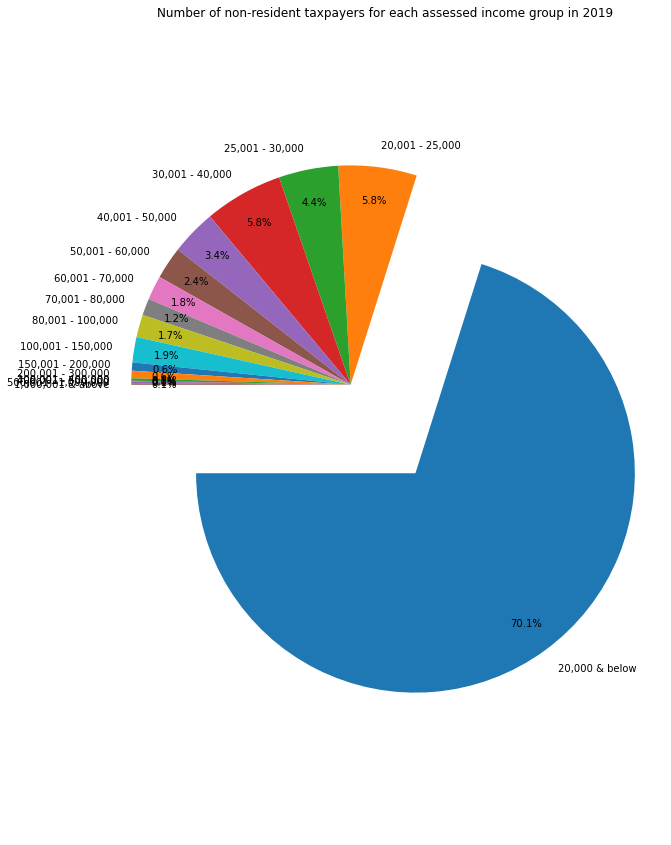

In [4]:
#plotting a pie chart of non-tax resident with matplotlib
#16 assessed income groups are the labels and the corresponding number of taxpayers in each income group (num) is plotted
labels = taxdf19_nres['assessed_income_group']
#print(labels)
num = taxdf19_nres['number_of_taxpayers']
explode = (0.5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0)
fig1, ax1 = plt.subplots(figsize=[10,15])
ax1.pie(num,explode=explode,labels=labels,autopct='%1.1f%%',startangle=180,pctdistance=0.85,labeldistance=1.1)
        
ax1.axis('equal')
plt.title('Number of non-resident taxpayers for each assessed income group in 2019')

plt.show()

Text(0.5, 6.800000000000011, 'Assessed Income Groups')

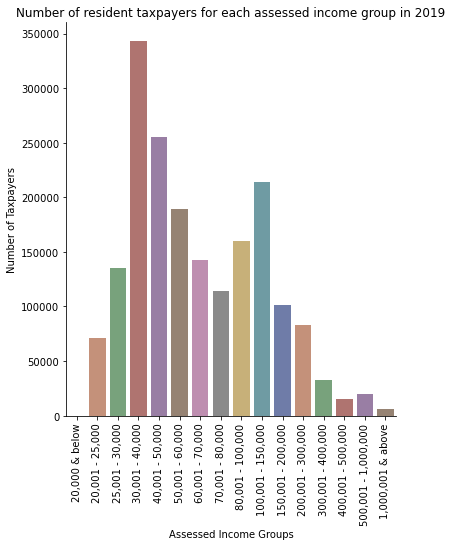

In [5]:
#plotting a bar chart of tax resident with seaborn
#16 assessed income groups are on the x axis and the corresponding number of taxpayers in each income group in y axis is plotted
x =taxdf19_res['assessed_income_group']
sns.catplot(data=taxdf, kind="bar", x=taxdf19_res['assessed_income_group'], y=taxdf19_res["number_of_taxpayers"], palette="dark", alpha=.6, height=6)

#rotate the x ticks label to vertical
plt.xticks(np.arange(16),x,rotation='vertical')
plt.title('Number of resident taxpayers for each assessed income group in 2019')
plt.ylabel('Number of Taxpayers')
plt.xlabel('Assessed Income Groups')